In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('~/Programming/MachineLearningProjects/MilesPerGalonPredictor/data/auto-mpg.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\batasoy/Programming/MachineLearningProjects/MilesPerGalonPredictor/data/auto-mpg.csv'

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000   

In [ ]:
df.drop(['car name'], axis=1, inplace=True)
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
df.fillna({'horsepower': df['horsepower'].median()}, inplace=True)

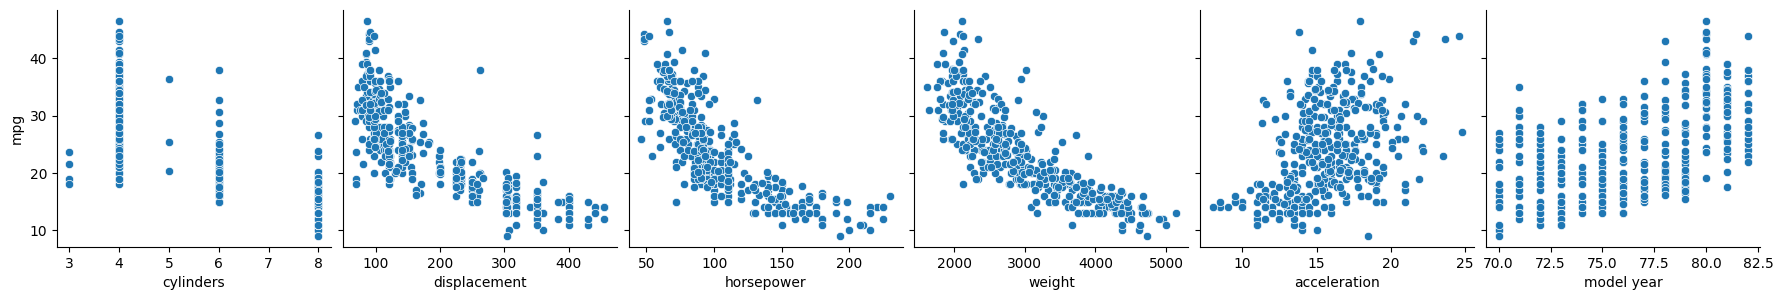

In [ ]:
sns.pairplot(df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'], y_vars='mpg', height=3)
plt.show()

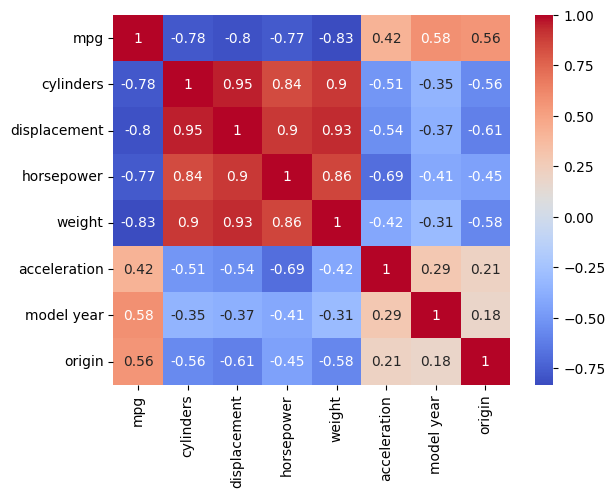

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df_one_hot = pd.get_dummies(df['origin'], prefix='', prefix_sep='')

df_one_hot.columns = ['origin_america', 'origin_europa', 'origin_japan']

df = pd.concat([df.drop(columns=['origin']), df_one_hot], axis=1)

df[['origin_america', 'origin_europa', 'origin_japan']] = df[['origin_america', 'origin_europa', 'origin_japan']].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    int64  
 8   origin_europa   398 non-null    int64  
 9   origin_japan    398 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 31.2 KB
None


In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_europa,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


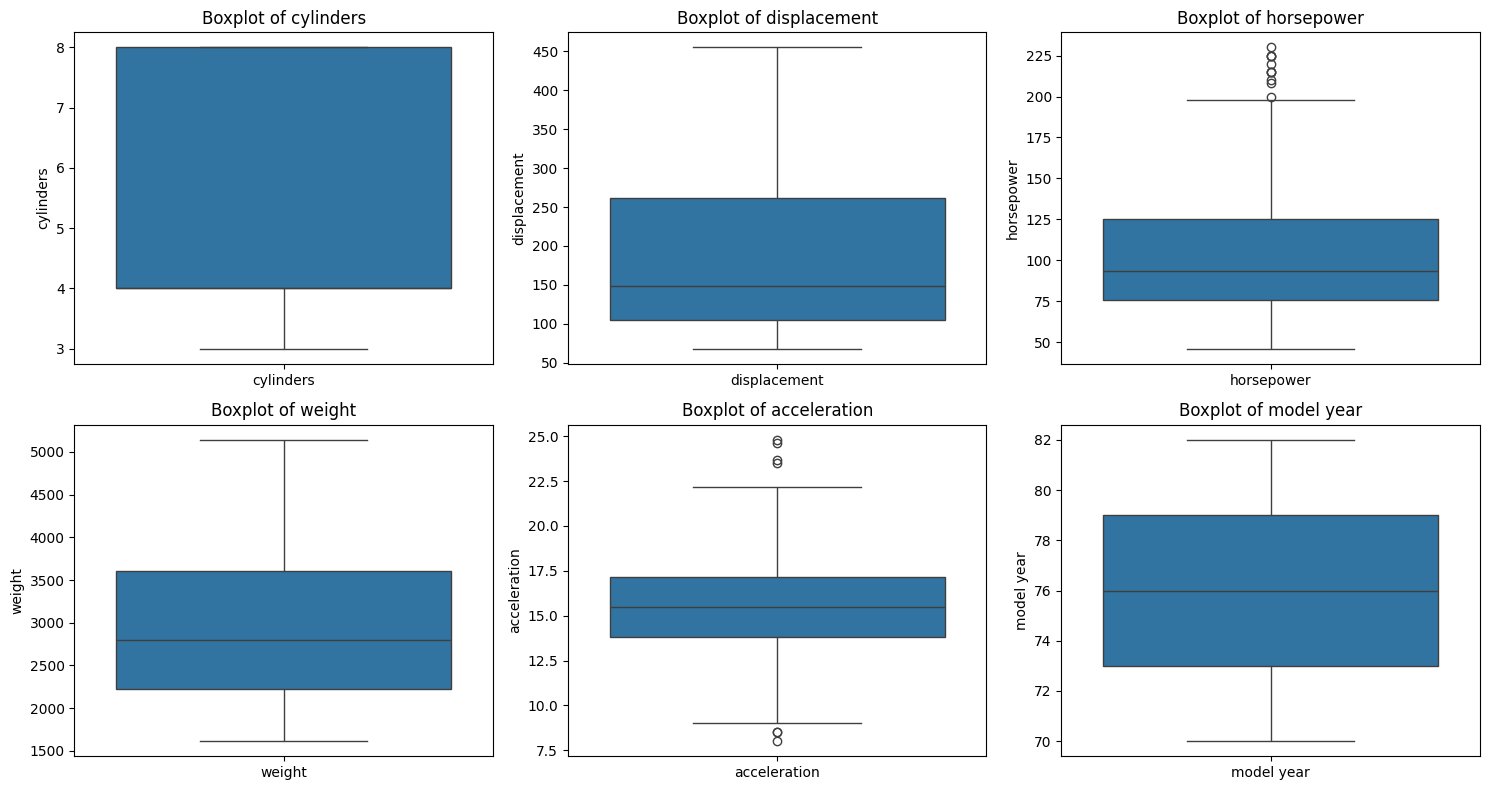

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

for i, column in enumerate(columns):
    ax = axes[i//3, i%3]
    sns.boxplot(data=df[[column]], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

In [ ]:
# Create training and test datasets

x = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_america', 'origin_europa', 'origin_japan']]
y = df['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Standard Scale
scaler_standard = StandardScaler()

x_train_standard = scaler_standard.fit_transform(x_train)
x_test_standard = scaler_standard.transform(x_test)

model_standard = LinearRegression()
model_standard.fit(x_train_standard, y_train)
y_pred_standard = model_standard.predict(x_test_standard)

In [ ]:
# MinMax Scale
scaler_minmax = MinMaxScaler()

x_train_minmax = scaler_minmax.fit_transform(x_train)
x_test_minmax = scaler_minmax.transform(x_test)

model_minmax = LinearRegression()
model_minmax.fit(x_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(x_test_minmax)

In [ ]:
# Evaluate Standardization
mse_standard = mean_squared_error(y_test, y_pred_standard)
r2_standard = r2_score(y_test, y_pred_standard)

# Evaluate Min-Max Scaling
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
r2_minmax = r2_score(y_test, y_pred_minmax)

# Print results
print("Performance with Standardization:")
print(f"Mean Squared Error: {mse_standard:.2f}")
print(f"R² Score: {r2_standard:.2f}\n")

print("Performance with Min-Max Scaling:")
print(f"Mean Squared Error: {mse_minmax:.2f}")
print(f"R² Score: {r2_minmax:.2f}")

Performance with Standardization:
Mean Squared Error: 8.42
R² Score: 0.84

Performance with Min-Max Scaling:
Mean Squared Error: 8.34
R² Score: 0.84


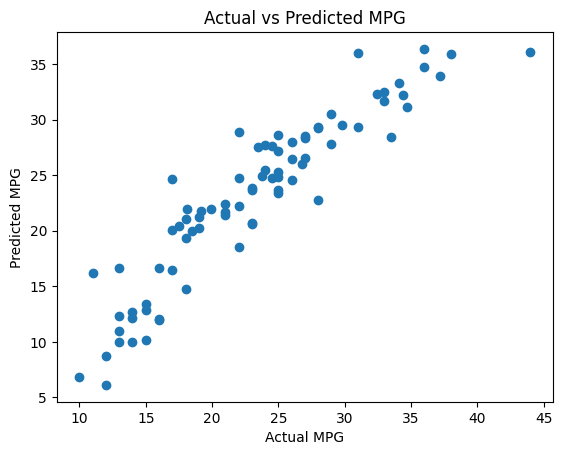

In [ ]:
def plot_results(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual MPG")
    plt.ylabel("Predicted MPG")
    plt.title("Actual vs Predicted MPG")
    plt.show()

plot_results(y_test, y_pred_standard)

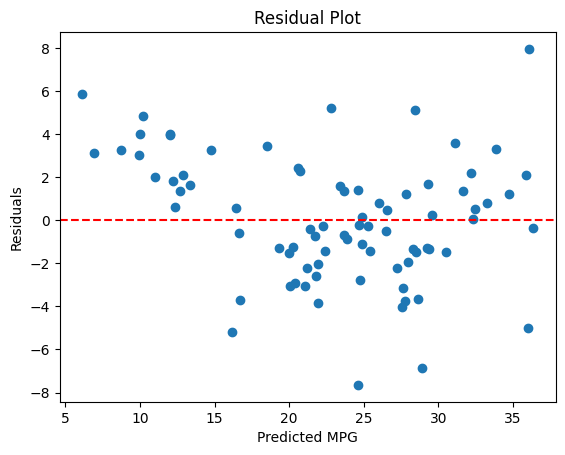

In [ ]:
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted MPG")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

plot_residuals(y_test, y_pred_standard)

In [ ]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_standard, y_train)
y_pred_ridge = ridge_model.predict(x_test_standard)
print("Ridge R-squared:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train_standard, y_train)
y_pred_lasso = lasso_model.predict(x_test_standard)
print("Lasso R-squared:", r2_score(y_test, y_pred_lasso))

Ridge R-squared: 0.844852097848957
Lasso R-squared: 0.8420141846536495


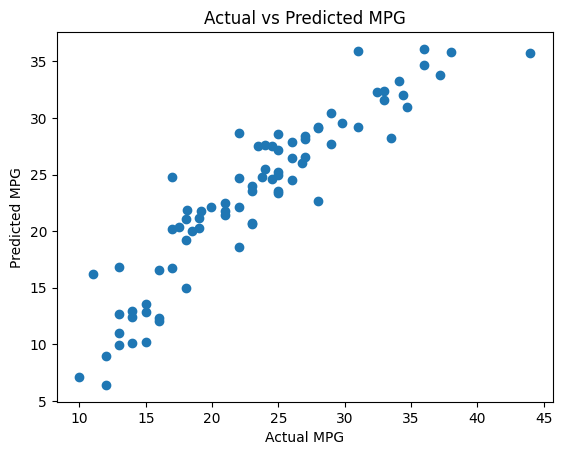

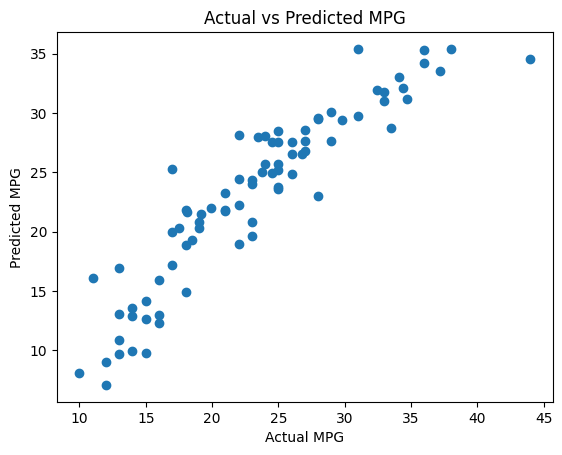

In [ ]:
plot_results(y_test, y_pred_ridge)
plot_results(y_test, y_pred_lasso)

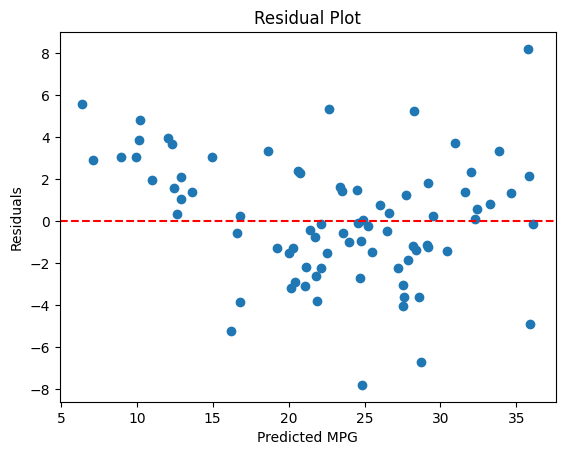

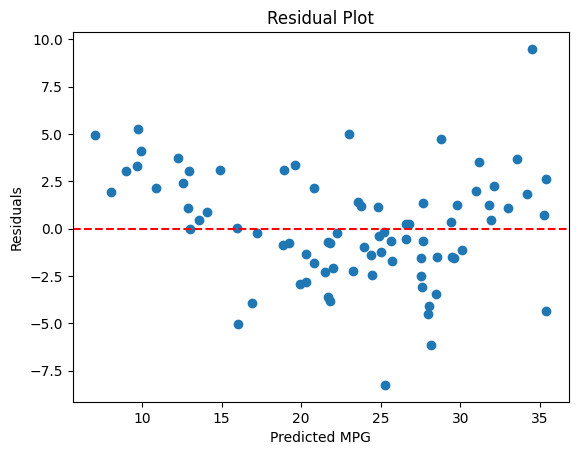

In [ ]:
plot_residuals(y_test, y_pred_ridge)
plot_residuals(y_test, y_pred_lasso)